In [1]:
import torch, random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [50]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [51]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.y_pred = torch.tensor(y_pred, requires_grad=True)
    self.z = (self.y_pred - y_true) ** 2
    return self.z

  def backward(self):
    self.z.backward()
    self.dinput = self.y_pred.grad

class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)

  def forward(self, inputs):
    self.inputs = inputs
    return (inputs @ self.weights.T) + self.bias

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss) - по сути производная ошибки dE
    self.dweights = dvalue * self.inputs # df/dW
    self.dinputs = dvalue * self.weights # df/wX
    self.dbias = dvalue # df/db

In [52]:
n_inputs = 4 # <размерность элемента выборки >
lr = 0.01 #  скорость обучения
n_epoch = 500 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
  for x_example, y_example in random.sample(list(zip(X, y)), 20):

    # Начало работы сети — активация нейрона
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # Обратное распространение ошибки
    loss.backward()
    neuron.backward(loss.dinput)

    # градиентный спуск —> обновление весов и смещений
    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias
    print(f'Epoch {epoch} mean loss {sum(losses) / len(losses)}')

    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>
  print()

C:\Users\admin\AppData\Local\Temp/ipykernel_17388/3217362107.py:19: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3281.)
  return (inputs @ self.weights.T) + self.bias
C:\Users\admin\AppData\Local\Temp/ipykernel_17388/3217362107.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)


Epoch 0 mean loss tensor([22921.6074], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([14739.8115], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([10294.5107], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([7722.1660], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([9174.4482], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([8009.4277], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([7447.5576], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([6654.7046], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([10155.3594], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([10769.6318], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([9939.6631], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([13112.6094], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([12539.7520], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([18395.3770], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([17423.0762], grad_fn=<DivBackward0>)
Epoch 0 mean loss tensor([16547.2344], grad_fn=<DivBackward0>

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, ord

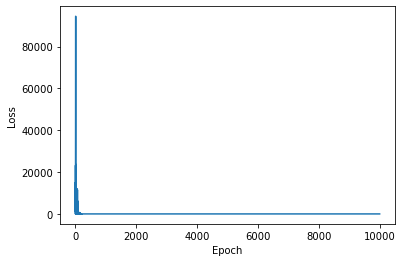

In [53]:
# График функции потерь
with torch.no_grad():
  plt.plot(losses)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [54]:
class ReLU:
  def forward(self, inputs):
    return torch.maximum(torch.zeros(inputs.shape), inputs)

class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_true - y_pred) ** 2) # <реализовать логику MSE>

class LinearReg:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
    self.biases = torch.randn(1, n_neurons, requires_grad=True)

  def forward(self, inputs):
    return (inputs @ self.weights) + self.biases

In [55]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

neuron_1 = LinearReg(X.size(1), 100)
neuron_2 = LinearReg(100, y.size(1))
loss_fn = MSELoss()
activation = ReLU()
batch_size = 30
learning_rate = 0.001
n_epoch = 1000

losses = []
for epoch in range(n_epoch):
  for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]

    # forward pass
    y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X_batch)))

    # Вычисление функции потерь
    curr_loss = loss_fn.forward(y_pred, y_batch)
    # backward pass (обратное распространение функции потерь и обновление весов)
    curr_loss.backward()

    losses.append(curr_loss.item())

    with torch.no_grad():
      neuron_1.weights -= learning_rate * neuron_1.weights.grad
      neuron_1.biases -= learning_rate * neuron_1.biases.grad

      neuron_2.weights -= learning_rate * neuron_2.weights.grad
      neuron_2.biases -= learning_rate * neuron_2.biases.grad

    neuron_1.weights.grad.zero_()
    neuron_1.biases.grad.zero_()

    neuron_2.weights.grad.zero_()
    neuron_2.biases.grad.zero_()

    print(f"Epoch {epoch} loss: {curr_loss}")
  print()

Epoch 0 loss: 53.049415588378906
Epoch 0 loss: 20.20812225341797
Epoch 0 loss: 0.48869359493255615
Epoch 0 loss: 1.0320838689804077

Epoch 1 loss: 30.122211456298828
Epoch 1 loss: 8.67197322845459
Epoch 1 loss: 1.806627631187439
Epoch 1 loss: 4.01447057723999

Epoch 2 loss: 22.27743911743164
Epoch 2 loss: 5.76154899597168
Epoch 2 loss: 2.8055639266967773
Epoch 2 loss: 4.897904396057129

Epoch 3 loss: 18.406776428222656
Epoch 3 loss: 4.678791522979736
Epoch 3 loss: 2.977233648300171
Epoch 3 loss: 4.753191947937012

Epoch 4 loss: 15.842203140258789
Epoch 4 loss: 4.094025611877441
Epoch 4 loss: 2.844013214111328
Epoch 4 loss: 4.310403823852539

Epoch 5 loss: 13.83576774597168
Epoch 5 loss: 3.6788170337677
Epoch 5 loss: 2.629746198654175
Epoch 5 loss: 3.8205273151397705

Epoch 6 loss: 12.146920204162598
Epoch 6 loss: 3.3382070064544678
Epoch 6 loss: 2.4074926376342773
Epoch 6 loss: 3.3595643043518066

Epoch 7 loss: 10.685382843017578
Epoch 7 loss: 3.043046712875366
Epoch 7 loss: 2.19932532

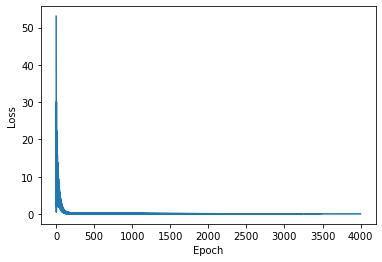

In [56]:
# График функции потерь
with torch.no_grad():
  plt.plot(losses)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

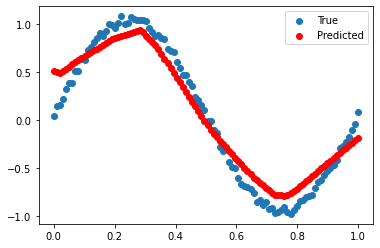

In [57]:
# График исходных данных и предсказанных значений
with torch.no_grad():
  y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X)))
  plt.scatter(X, y, label="True")
  plt.scatter(X, y_pred.detach(), label="Predicted", color="red")
  plt.legend()
  plt.show()

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [58]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [59]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [60]:
n_inputs = 4 # <размерность элемента выборки >
lr = 0.0001 #  скорость обучения
n_epoch = 500 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()
optimizer = optim.SGD(params=[neuron.weights, neuron.bias], lr=lr)
losses = []

for epoch in range(n_epoch):
  for x_example, y_example in zip(X, y):
    optimizer.zero_grad()

    y_pred = neuron.forward(x_example)
    curr_loss = loss.forward(y_pred, y_example)

    loss.backward()

    losses.append(curr_loss)

    neuron.backward(loss.dinput)
    optimizer = optim.SGD(params=[neuron.weights, neuron.bias], lr=lr)
    with torch.no_grad():
      neuron.weights -= lr * neuron.dweights
      neuron.bias -= lr * neuron.dbias
    optimizer.step()

  print(f'Epoch {epoch} mean loss {sum(losses) / len(losses)}')

C:\Users\admin\AppData\Local\Temp/ipykernel_17388/3217362107.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)


Epoch 0 mean loss tensor([7470.4575], grad_fn=<DivBackward0>)
Epoch 1 mean loss tensor([7351.4194], grad_fn=<DivBackward0>)
Epoch 2 mean loss tensor([7235.0659], grad_fn=<DivBackward0>)
Epoch 3 mean loss tensor([7121.3213], grad_fn=<DivBackward0>)
Epoch 4 mean loss tensor([7010.1133], grad_fn=<DivBackward0>)
Epoch 5 mean loss tensor([6901.3735], grad_fn=<DivBackward0>)
Epoch 6 mean loss tensor([6795.0405], grad_fn=<DivBackward0>)
Epoch 7 mean loss tensor([6691.0488], grad_fn=<DivBackward0>)
Epoch 8 mean loss tensor([6589.3301], grad_fn=<DivBackward0>)
Epoch 9 mean loss tensor([6489.8320], grad_fn=<DivBackward0>)
Epoch 10 mean loss tensor([6392.4937], grad_fn=<DivBackward0>)
Epoch 11 mean loss tensor([6297.2544], grad_fn=<DivBackward0>)
Epoch 12 mean loss tensor([6204.0645], grad_fn=<DivBackward0>)
Epoch 13 mean loss tensor([6112.8687], grad_fn=<DivBackward0>)
Epoch 14 mean loss tensor([6023.6147], grad_fn=<DivBackward0>)
Epoch 15 mean loss tensor([5936.2500], grad_fn=<DivBackward0>)
Ep

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, ord

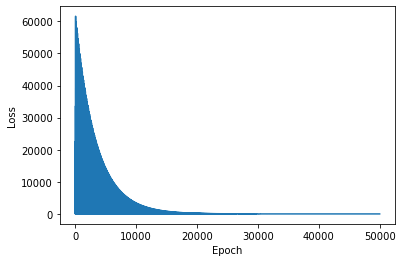

In [61]:
# График функции потерь
with torch.no_grad():
  plt.plot(losses)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [62]:
class LinearReg:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.normal(0, 1, (n_features, n_neurons), requires_grad=True)
    self.biases = torch.zeros(1, n_neurons, requires_grad=True)

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [63]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

neuron_1 = LinearReg(X.size(1), 100)
neuron_2 = LinearReg(100, y.size(1))
loss_fn = MSELoss()
activation = ReLU()
batch_size = 30
learning_rate = 0.01
n_epoch = 1000

optimizer = optim.Adam(params=[neuron_1.weights, neuron_1.biases, neuron_2.weights, neuron_2.biases], lr=learning_rate)

losses = []
for epoch in range(n_epoch):
  for i in range(0, len(X), batch_size):
    X_batch = X[i:i + batch_size]
    y_batch = y[i:i + batch_size]

    # Прямой проход
    y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X_batch)))

    # Вычисление функции потерь
    loss = loss_fn.forward(y_pred, y_batch)

    # Обратное распространение и обновление весов (автоматическое дифференцирование autograd)
    loss.backward()
    losses.append(loss.item())

    with torch.no_grad():
      neuron_1.weights -= learning_rate * neuron_1.weights.grad
      neuron_1.biases -= learning_rate * neuron_1.biases.grad

      neuron_2.weights -= learning_rate * neuron_2.weights.grad
      neuron_2.biases -= learning_rate * neuron_2.biases.grad

    optimizer.step()
    optimizer.zero_grad()

    print(f"Epoch {epoch} loss: {loss}")
  print()

Epoch 0 loss: 3.822498083114624
Epoch 0 loss: 0.4743746221065521
Epoch 0 loss: 0.6793021559715271
Epoch 0 loss: 4.351284503936768

Epoch 1 loss: 6.482711315155029
Epoch 1 loss: 4.991067886352539
Epoch 1 loss: 0.16198495030403137
Epoch 1 loss: 1.989530324935913

Epoch 2 loss: 0.32558590173721313
Epoch 2 loss: 1.4881895780563354
Epoch 2 loss: 0.7896740436553955
Epoch 2 loss: 2.254316568374634

Epoch 3 loss: 0.009468740783631802
Epoch 3 loss: 1.1911853551864624
Epoch 3 loss: 1.3179510831832886
Epoch 3 loss: 2.4334492683410645

Epoch 4 loss: 0.15812040865421295
Epoch 4 loss: 1.1772412061691284
Epoch 4 loss: 1.7785166501998901
Epoch 4 loss: 2.4949936866760254

Epoch 5 loss: 0.3820576071739197
Epoch 5 loss: 1.1124225854873657
Epoch 5 loss: 2.1636085510253906
Epoch 5 loss: 2.5346038341522217

Epoch 6 loss: 0.564387857913971
Epoch 6 loss: 1.0349432229995728
Epoch 6 loss: 2.4607129096984863
Epoch 6 loss: 2.487133502960205

Epoch 7 loss: 0.7094148397445679
Epoch 7 loss: 0.9247195720672607
Epoch 

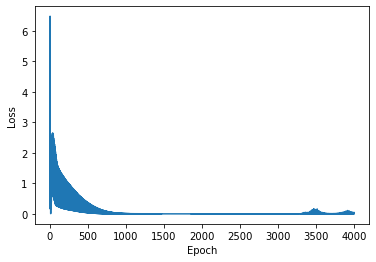

In [64]:
# График функции потерь
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

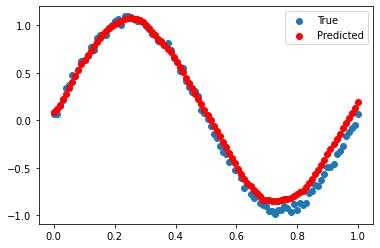

In [65]:
# График исходных данных и предсказанных значений
with torch.no_grad():
  y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X)))
  plt.scatter(X, y, label="True")
  plt.scatter(X, y_pred.detach(), label="Predicted", color="red")
  plt.legend()
  plt.show()

## 3.3 Построение сетей при помощи `torch.nn`

In [66]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [67]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.5 * torch.rand(X.size())

In [68]:
class SineNet(nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sidenet = SineNet(30)

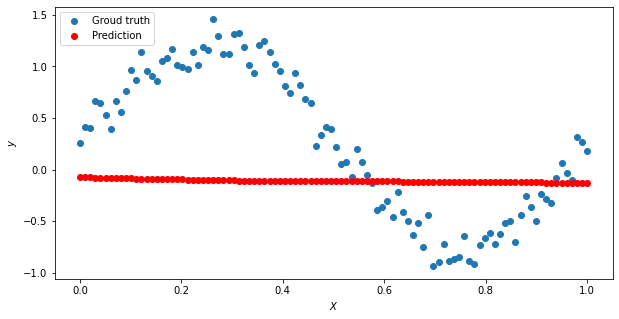

In [69]:
def predict(net, X, y):
  y_pred = net.forward(X)

  plt.figure(figsize=(10, 5))
  plt.plot(X.numpy(), y.numpy(), 'o', label='Groud truth')
  plt.plot(X.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$X$')
  plt.ylabel('$y$')

predict(sidenet, X, y)

In [70]:
optimizer = optim.Adam(sidenet.parameters(), lr=0.01)
criterion = nn.MSELoss(reduction='mean')

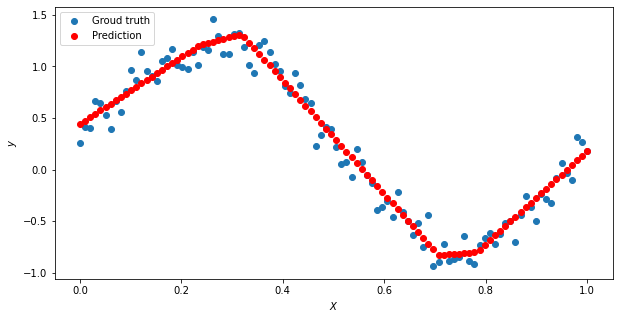

In [71]:
losses = []
for epoch_index in range(1000):
  optimizer.zero_grad()

  y_pred = sidenet.forward(X)
  loss_val = criterion.forward(y_pred, y)

  losses.append(loss_val.item())
  loss_val.backward()

  optimizer.step()

predict(sidenet, X, y)

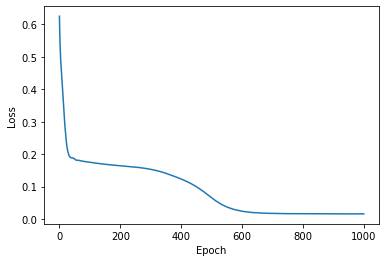

In [72]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Построение нейронной сети с 2 полносвязными слоями

In [73]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.4 * torch.rand(X.size())

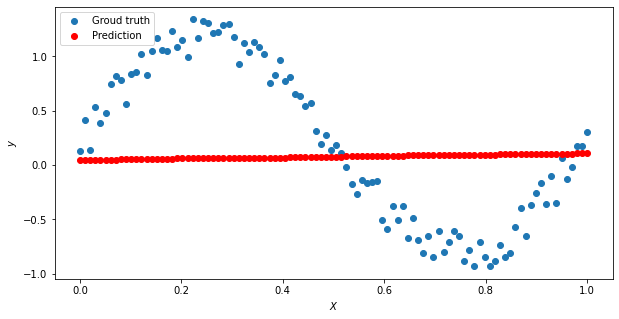

In [74]:
class SideNet2(nn.Module):
  def __init__(self, n_hidden_neurons, n_hidden_neurons2):
    super(SideNet2, self).__init__()
    self.fc1 = nn.Linear(1, n_hidden_neurons)
    self.act1 = nn.ReLU()
    self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons2)
    self.act2 = nn.Tanh()
    self.fc3 = nn.Linear(n_hidden_neurons2, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

sidenet2 = SideNet2(25, 30)
predict(sidenet2, X, y)

In [75]:
optimizer = optim.Adam(sidenet2.parameters(), lr=0.01)
criterion = nn.MSELoss(reduction='sum')

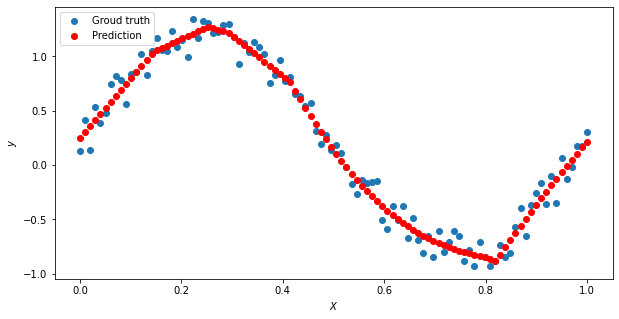

In [76]:
losses = []
for epoch_index in range(1000):
  optimizer.zero_grad()

  y_pred = sidenet2.forward(X)
  loss_val = criterion.forward(y_pred, y)

  losses.append(loss_val.item())
  loss_val.backward()

  optimizer.step()

predict(sidenet2, X, y)

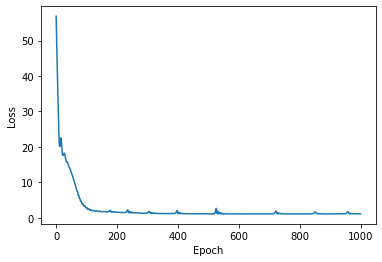

In [77]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [78]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 1 * torch.rand(X.size())

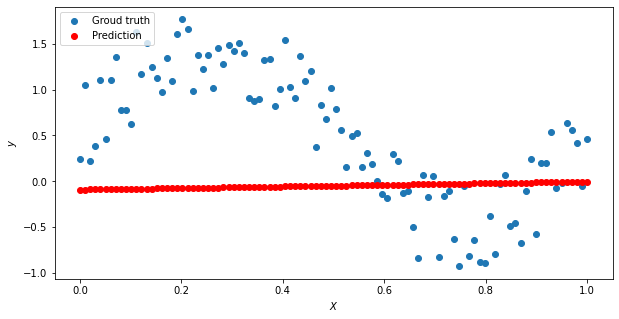

In [79]:
# определение размерности слоя сети
hidden_dim = 25

model = nn.Sequential(
  nn.Linear(1, hidden_dim),
  nn.Sigmoid(),
  nn.Linear(hidden_dim, 1)
)

# определение функции потерь
loss_fn = nn.MSELoss(reduction='sum')

# определение оптимизатора
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
predict(model, X, y)

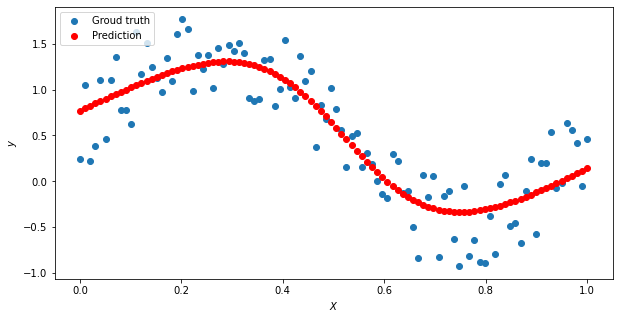

In [80]:
losses = []
for epoch_index in range(1000):
  optimizer.zero_grad()

  y_pred = model(X)
  loss_val = loss_fn.forward(y_pred, y)

  losses.append(loss_val.item())
  loss_val.backward()

  optimizer.step()

predict(model, X, y)

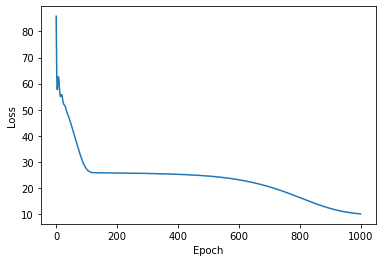

In [81]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 3.4. Datasets and dataloaders

In [82]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [83]:
class SinDataset(Dataset):
  def __init__(self):
    self.X = torch.linspace(0, 1, 100).view(-1, 1)
    self.y = torch.sin(2 * np.pi * X) + 1 * torch.rand(X.size())

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [85]:
dataset = SinDataset()
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

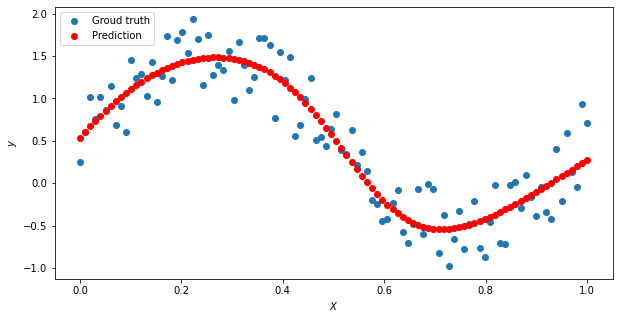

In [86]:
model = nn.Sequential(
    nn.Linear(1, 10),  # Полносвязный слой с 1 входом и 10 выходами
    nn.Sigmoid(),  # Функция активации
    nn.Linear(10, 1)  # Полносвязный слой с 10 входами и 1 выходом
)

loss_fn = nn.MSELoss()
num_epochs = 1000
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()

        y_pred = model(batch_x)
        loss = loss_fn(y_pred, batch_y)

        loss.backward()
        optimizer.step()

predict(model, dataset.X, dataset.y)

3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [87]:
import pandas as pd

In [94]:
class DiamondsDataset(Dataset):
  def __init__(self, data):
    self.data = data.drop(axis=0, columns=["Unnamed: 0"]).select_dtypes(include=['float64', 'int64'])
    self.y = torch.tensor(self.data["price"].values)
    self.X = torch.tensor(self.data.drop(axis=0, columns=["price"]).values)

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return self.X[idx].float(), self.y[idx].float()

In [95]:
with open('diamonds.csv', 'r', encoding='utf-8') as file:
  dataset = pd.read_csv(file)

diamond = DiamondsDataset(dataset)
diamond.data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [96]:
diamond.X, diamond.y

(tensor([[ 0.2300, 61.5000, 55.0000,  3.9500,  3.9800,  2.4300],
         [ 0.2100, 59.8000, 61.0000,  3.8900,  3.8400,  2.3100],
         [ 0.2300, 56.9000, 65.0000,  4.0500,  4.0700,  2.3100],
         ...,
         [ 0.7000, 62.8000, 60.0000,  5.6600,  5.6800,  3.5600],
         [ 0.8600, 61.0000, 58.0000,  6.1500,  6.1200,  3.7400],
         [ 0.7500, 62.2000, 55.0000,  5.8300,  5.8700,  3.6400]],
        dtype=torch.float64),
 tensor([ 326,  326,  327,  ..., 2757, 2757, 2757]))

In [97]:
train_dataset, test_dataset = torch.utils.data.random_split(diamond, [int(len(diamond)*0.8),
                                                     len(diamond)-int(len(diamond)*0.8)])
train_dataset, test_dataset

(<torch.utils.data.dataset.Subset at 0x1da29d9e550>,
 <torch.utils.data.dataset.Subset at 0x1da29d9e880>)

In [102]:
# определение размерности слоя сети
hidden1_dim = 75
hidden2_dim = 50

model = nn.Sequential(
  nn.Linear(6, hidden1_dim),
  nn.LayerNorm(hidden1_dim),
  nn.Sigmoid(),
  nn.Linear(hidden1_dim, hidden2_dim),
  nn.LayerNorm(hidden2_dim),
  nn.ReLU(),
  nn.Linear(hidden2_dim, 1)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# определение функции потерь
loss_fn = nn.MSELoss()

# определение оптимизатора
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Создаем загрузчики данных
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [103]:
losses = []
for epoch_index in range(20):
  loss_run = 0.00
  for inputs, target in train_loader:
    inputs = inputs.to(device)
    target = target.to(device)

    optimizer.zero_grad()

    y_pred = model(inputs)
    loss_val = loss_fn.forward(y_pred, target)
    loss_val.backward()
    optimizer.step()

    loss_run += loss_val.item()
  loss_epoch = loss_run / len(train_loader)
  losses.append(loss_epoch)
  print(f"Epoch {epoch_index}, Loss: {loss_epoch}")

C:\Users\admin\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\admin\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([144])) that is different to the input size (torch.Size([144, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 30653437.70414201
Epoch 1, Loss: 27409770.585798815
Epoch 2, Loss: 22486042.195266273
Epoch 3, Loss: 18472212.02366864
Epoch 4, Loss: 16478887.142011834
Epoch 5, Loss: 15948460.396449704
Epoch 6, Loss: 15861710.597633136
Epoch 7, Loss: 15855072.9704142
Epoch 8, Loss: 15846565.786982248
Epoch 9, Loss: 15849266.73964497
Epoch 10, Loss: 15859412.100591715
Epoch 11, Loss: 15856494.76331361
Epoch 12, Loss: 15863659.668639053
Epoch 13, Loss: 15862696.508875739
Epoch 14, Loss: 15857016.621301776
Epoch 15, Loss: 15860665.550295858
Epoch 16, Loss: 15843796.183431953
Epoch 17, Loss: 15869122.272189349
Epoch 18, Loss: 15857421.142011834
Epoch 19, Loss: 15867688.325443788


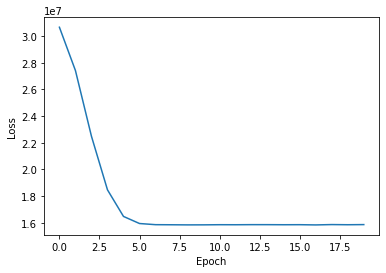

In [104]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [114]:
class DiamondsDataset(Dataset):
  def __init__(self, data, transform=None):
    self.data = pd.read_csv(data, index_col=0)
    self.y = self.data['price']
    self.data = self.data.drop('price', axis=1)
    self.X = self.data
    self.transform = transform

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    sample = self.X.iloc[idx], self.y.iloc[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [115]:
class DropColsTransform:
  def __init__(self, drop):
    self.drop = drop
  
  def __call__(self, sample):
    X, y = sample
    X = X.drop(X.index[self.drop], axis=0)
    return X, y

In [116]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    X = torch.tensor(X.astype('float64').values).float()
    y = torch.tensor(y).float()
    return X, y

In [117]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset('diamonds.csv', transforms.Compose([drop, to_tensor]))

train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

train_dataset = DataLoader(train, batch_size=256)
test_dataset = DataLoader(test, batch_size=256)

In [118]:
# определение размерности слоя сети
hidden1_dim = 125
hidden2_dim = 75

model = nn.Sequential(
  nn.Linear(6, hidden1_dim),
  nn.LayerNorm(hidden1_dim),
  nn.Sigmoid(),
  nn.Linear(hidden1_dim, hidden2_dim),
  nn.LayerNorm(hidden2_dim),
  nn.ReLU(),
  nn.Linear(hidden2_dim, 1)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# определение функции потерь
loss_fn = nn.MSELoss()

# определение оптимизатора
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []
for epoch in range(20):
  loss_run = 0.00
  for inputs, target in train_dataset:
    inputs = inputs.to(device)
    target = target.to(device)

    optimizer.zero_grad()

    y_pred = model(inputs)
    loss = loss_fn(y_pred, target)
    loss.backward()

    optimizer.step()

    loss_run += loss.item()
  loss_epoch = loss_run / len(train_dataset)
  losses.append(loss_epoch)
  print(f"Epoch {epoch}, Loss: {loss_epoch}")

C:\Users\admin\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\admin\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([144])) that is different to the input size (torch.Size([144, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 30381259.609467454
Epoch 1, Loss: 24713762.44970414
Epoch 2, Loss: 18597881.846153848
Epoch 3, Loss: 16254680.059171598
Epoch 4, Loss: 15963483.77514793
Epoch 5, Loss: 15951793.25443787
Epoch 6, Loss: 15952019.846153846
Epoch 7, Loss: 15951554.952662721
Epoch 8, Loss: 15951505.639053255
Epoch 9, Loss: 15951546.520710059
Epoch 10, Loss: 15951619.704142012
Epoch 11, Loss: 15951868.76923077
Epoch 12, Loss: 15952261.881656805
Epoch 13, Loss: 15951946.644970413
Epoch 14, Loss: 15951836.792899407
Epoch 15, Loss: 15951936.928994082
Epoch 16, Loss: 15952110.349112427
Epoch 17, Loss: 15952283.349112427
Epoch 18, Loss: 15952158.485207101
Epoch 19, Loss: 15952093.568047337


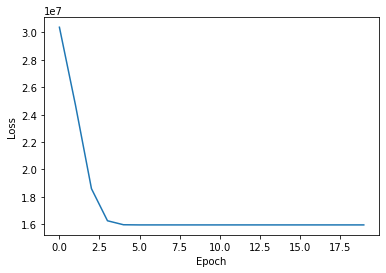

In [119]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()